In [42]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, mutual_info_regression


# Explore here

In [9]:
#CARGAR DATOS Y EDA 

#Importar el csv:

url= "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"

df= pd.read_csv(url)
#Creo 4 columnas, una para cada región y elimino la columna región 
df_dummies = pd.get_dummies(df['region'], prefix='region')
df = pd.concat([df, df_dummies], axis=1)
df.head()
df = df.drop('region', axis=1)

#Eliminar duplicados:
df.drop_duplicates()
df.head()

#Convierto los valores cualitativos en cuantitativos:

le= LabelEncoder()

df["sex"]= le.fit_transform(df["sex"])
df["smoker"]= le.fit_transform(df["smoker"])
df["region_northeast"]= le.fit_transform(df["region_northeast"])
df["region_northwest"]= le.fit_transform(df["region_northwest"])
df["region_southeast"]= le.fit_transform(df["region_southeast"])
df["region_southwest"]= le.fit_transform(df["region_southwest"])
#

variables=["age","sex",	"bmi",	"children",	"smoker",	"charges",	"region_northeast",	"region_northwest",	"region_southeast",	"region_southwest"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[variables])
df_escalado= pd.DataFrame(scal_features, index = df.index, columns = variables)
df_escalado.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.0,0.321227,0.0,1.0,0.251611,0.0,0.0,0.0,1.0
1,0.000000,1.0,0.479150,0.2,0.0,0.009636,0.0,0.0,1.0,0.0
2,0.217391,1.0,0.458434,0.6,0.0,0.053115,0.0,0.0,1.0,0.0
3,0.326087,1.0,0.181464,0.0,0.0,0.333010,0.0,1.0,0.0,0.0
4,0.304348,1.0,0.347592,0.0,0.0,0.043816,0.0,1.0,0.0,0.0


In [22]:
#TRAIN Y TEST

X = df_escalado.drop("charges", axis=1) 
y = df_escalado["charges"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selection_model = SelectKBest(score_func=mutual_info_regression, k=5)
selection_model.fit(X_train, y_train)
selec = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[selec])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[selec])
X_train_sel.head()

#Uso f-ANOVA porque la variable objeto es continua y no funciona asi que cambio a mutual_info_regression

,age,sex,bmi,children,smoker
0,0.608696,0.0,0.107345,0.4,0.0
1,0.630435,0.0,0.224913,0.0,0.0
2,0.739130,0.0,0.239440,0.0,0.0
3,0.456522,0.0,0.493947,1.0,0.0
4,0.782609,0.0,0.148238,0.6,0.0


In [23]:
X_test_sel.head()


,age,sex,bmi,children,smoker
0,0.586957,0.0,0.247915,0.4,0.0
1,0.391304,0.0,0.378262,0.0,0.0
2,1.000000,0.0,0.293920,0.0,1.0
3,0.608696,1.0,0.263250,0.6,0.0
4,0.021739,1.0,0.429379,0.0,1.0


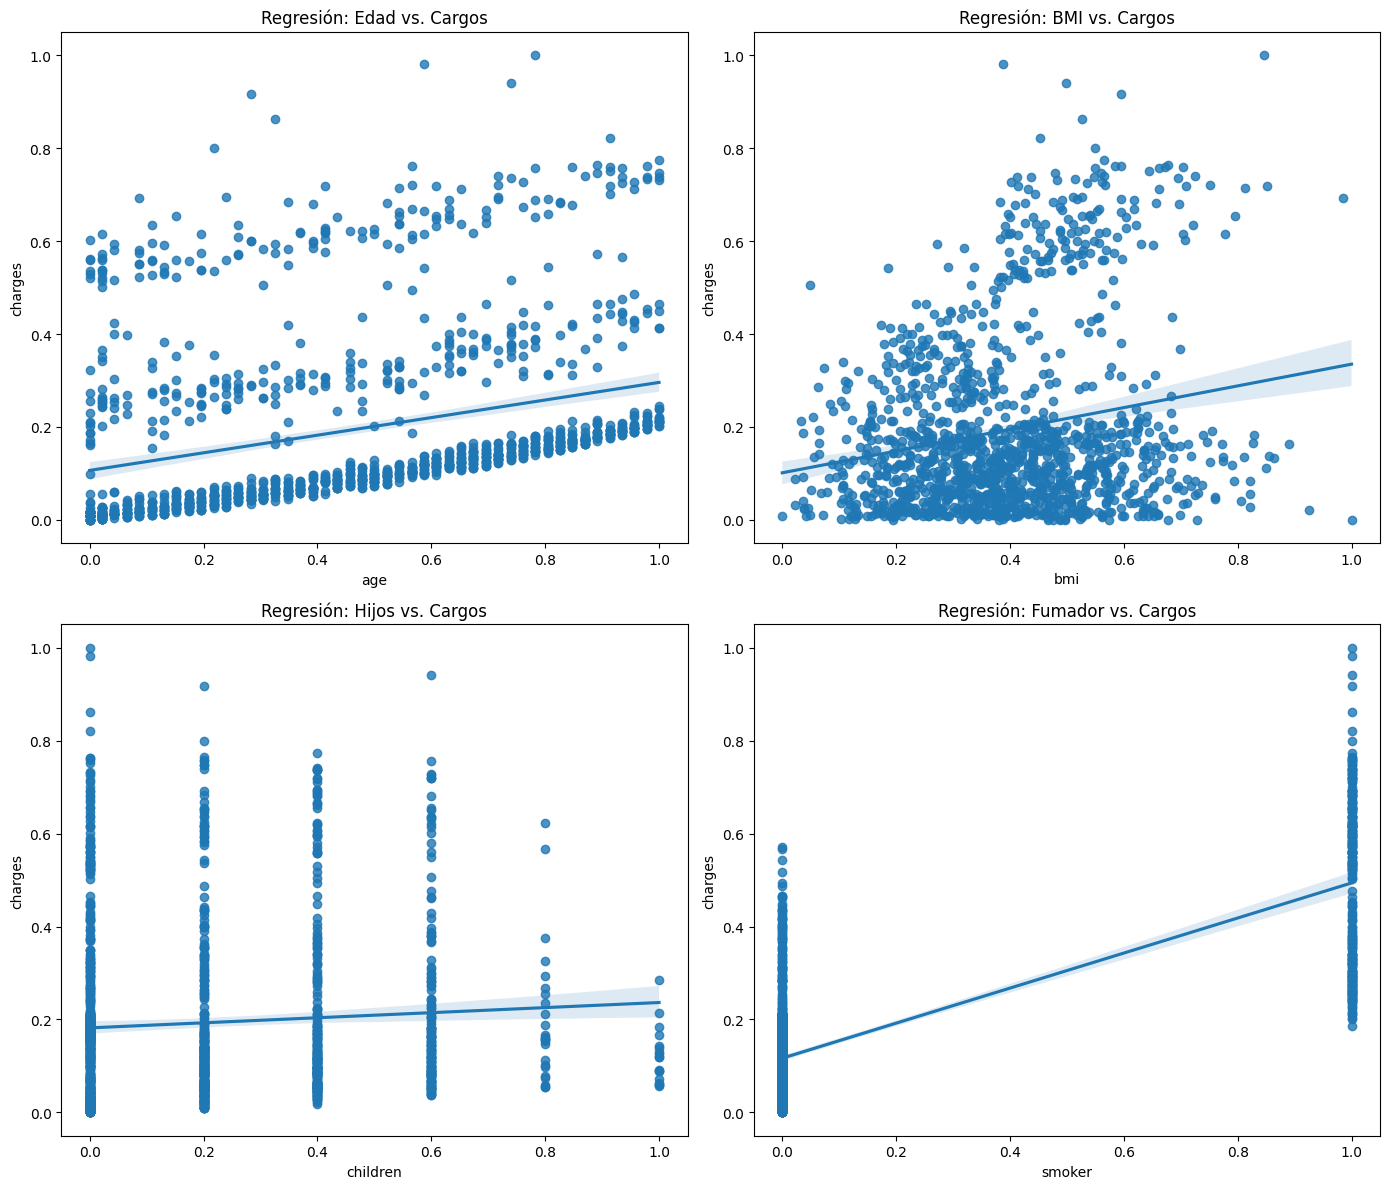

In [34]:

# Visualización de regresión
fig, axis = plt.subplots(2, 2, figsize=(14, 12))

sns.regplot(x=df_escalado['age'], y=df_escalado['charges'], ax=axis[0, 0])
axis[0, 0].set_title('Regresión: Edad vs. Cargos')

sns.regplot(x=df_escalado['bmi'], y=df_escalado['charges'], ax=axis[0, 1])
axis[0, 1].set_title('Regresión: BMI vs. Cargos')

sns.regplot(x=df_escalado['children'], y=df_escalado['charges'], ax=axis[1, 0])
axis[1, 0].set_title('Regresión: Hijos vs. Cargos')

sns.regplot(x=df_escalado['smoker'], y=df_escalado['charges'], ax=axis[1, 1])
axis[1, 1].set_title('Regresión: Fumador vs. Cargos')

plt.tight_layout()
plt.show()

In [44]:
model = LinearRegression()
model.fit(X_train_sel, y_train)

y_pred = model.predict(X_test_sel)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.6f}")
print(f"R2: {r2:.4f}")

#Los valores de R2 y de MSE son buenos y no hace falta optimizar el modelo

MSE: 0.008657
R2: 0.7811


In [24]:
#Resumen de correlación de datos
X = df.drop(["charges", "region_northeast"], axis=1)
y = df["charges"]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

df.head()


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:11:28   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819  

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


Según los datos: 
La edad aumenta en 257.2881 unidades el precio medio del seguro de salud.
El sexo p>0.1 por lo que no es relevante y la variable smoker es la que más incrementa el precio del seguro. 
El bmi aumenta en 332.5701 unidades el precio medio del seguro de salud.
El número de hijos aumenta en 479.3694 unidades el precio medio del seguro de salud.
Ser fumador aumenta en 23820 unidades el precio medio del seguro de salud.
Vivir en la región northwest supone una disminución del precio 352.9639 unidades en comparación con la región northeast
Vivir en la región southeast supone una disminución del precio 1035.0220 unidades en comparación con la región northeast
Vivir en la región southeast supone una disminución del precio 960.0510 unidades en comparación con la región northeast
Por tanto, la región northeast tiene los seguros de salud más caros.

El valor de R-cuadrado muestra que la variabilidad del precio del seguro de salud está explicado en un 75% con estas variables

Además, la región en la que vives puede disminuir el precio del seguro. Siendo 